## Applied Machine Learning Individual Project

**Author:** Rahul Chauhan

**Student ID:** 110567481

**References:**
1. Dataset: https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
2. https://keras.io/examples/timeseries/timeseries_weather_forecasting/
3. https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
4. https://mlnow.ai/
**Instructions to run the code:**
If you have 32GB of RAM and 500GB minimum SSD, run it in Jupyter Notebook. If not, your kernel will die. Use colab instead to run the code. Thanks!


In [8]:
# Importing Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [9]:
# Dataset
climate_data = pd.read_csv("/content/climate_weather_data.csv")

In [10]:
# Get a glimpse of the dataset
climate_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [11]:
# Ensuring 'date time' is in proper format
climate_data.index = pd.to_datetime(climate_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
climate_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 00:10:00,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
2009-01-01 00:20:00,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2009-01-01 00:30:00,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
2009-01-01 00:40:00,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
2009-01-01 00:50:00,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


<Axes: xlabel='Date Time'>

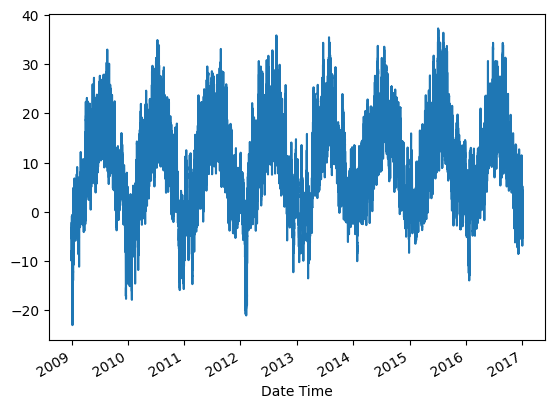

In [12]:
# Plotting the "T (degC)" variable
temp = climate_data['T (degC)']
temp.plot()

In [13]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def climate_data_to_X_y(climate_data, window_size=5):
  climate_data_as_np = climate_data.to_numpy()
  X = []
  y = []
  for i in range(len(climate_data_as_np)-window_size):
    row = [[a] for a in climate_data_as_np[i:i+window_size]]
    X.append(row)
    label = climate_data_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [14]:
# Window size = 5, displaying the shape of X1, y1
WINDOW_SIZE = 5
X1, y1 = climate_data_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((420546, 5, 1), (420546,))

In [15]:
# Training and testing sets
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (355546, 5, 1), (355546,))

In [16]:
# Training Model 1
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [18]:
# Check the fit of the model
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 28.6147 - root_mean_squared_error: 5.3493 - val_loss: 0.3559 - val_root_mean_squared_error: 0.5966
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0533 - root_mean_squared_error: 1.0263 - val_loss: 0.1173 - val_root_mean_squared_error: 0.3425
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1794 - root_mean_squared_error: 0.4235 - val_loss: 0.0777 - val_root_mean_squared_error: 0.2787
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0886 - root_mean_squared_error: 0.2976 - val_loss: 0.0661 - val_root_mean_squared_error: 0.2571
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0639 - root_mean_squared_error: 0.2528 - val_loss: 0.0593 - val_root_mean_squared_error: 0.2435
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0550 - root_mean_squared_error: 0.2345 - val_

In [19]:
model1 = load_model('model1/')

In [20]:
# Looking at the predictions
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 [==============================] - 5s 2ms/step


,Train Predictions,Actuals
0,-8.171443,-8.05
1,-7.922527,-7.62
2,-7.434572,-7.62
3,-7.382889,-7.91
4,-7.783380,-8.43
...,...,...
59995,1.786154,1.82
59996,1.805869,1.88
59997,1.886692,1.74
59998,1.684127,1.64


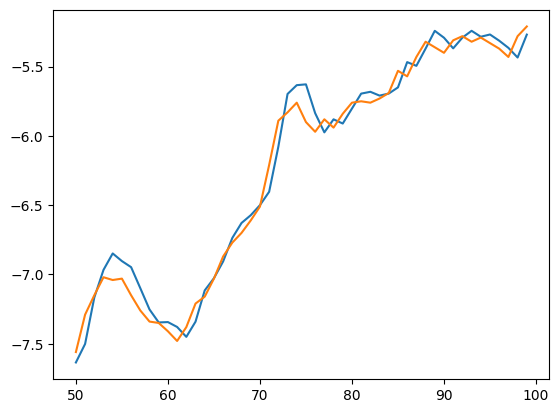

In [21]:
# Look at the plot of the train predictions, they seem to perform well and are quite accurate
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [22]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 [==============================] - 2s 2ms/step


,Val Predictions,Actuals
0,1.550974,1.57
1,1.525932,1.49
2,1.439455,1.38
3,1.313436,1.26
4,1.176123,1.20
...,...,...
4995,8.616693,8.78
4996,9.080048,8.91
4997,9.044721,8.98
4998,9.124681,9.19


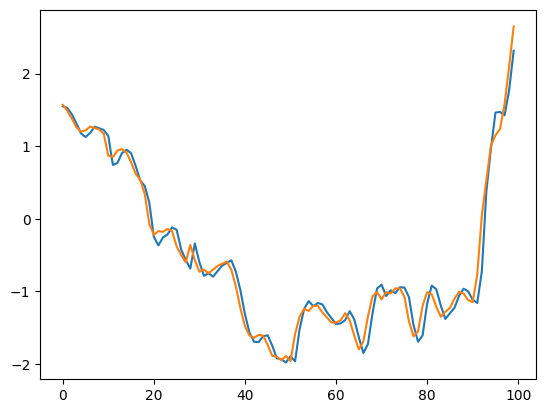

In [23]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [24]:
# Test Predictions
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

11111/11111 [==============================] - 35s 3ms/step


,Test Predictions,Actuals
0,8.871127,9.07
1,9.253286,9.11
2,9.159486,8.88
3,8.734188,8.76
4,8.782727,8.92
...,...,...
355541,-3.829144,-4.05
355542,-4.025550,-3.35
355543,-3.256075,-3.16
355544,-2.980618,-4.23


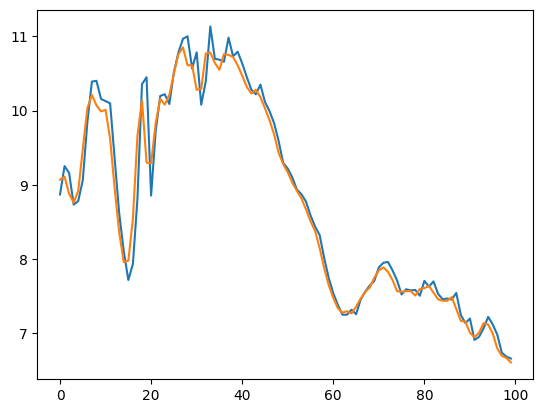

In [25]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [26]:
# Part 2

In [27]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  climate_data = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(climate_data['Predictions'][start:end])
  plt.plot(climate_data['Actuals'][start:end])
  return climate_data, mse(y, predictions)

11111/11111 [==============================] - 30s 3ms/step


(        Predictions  Actuals
 0          8.871127     9.07
 1          9.253286     9.11
 2          9.159486     8.88
 3          8.734188     8.76
 4          8.782727     8.92
 ...             ...      ...
 355541    -3.829144    -4.05
 355542    -4.025550    -3.35
 355543    -3.256075    -3.16
 355544    -2.980618    -4.23
 355545    -4.179048    -4.82
 
 [355546 rows x 2 columns],
 0.05021426849756859)

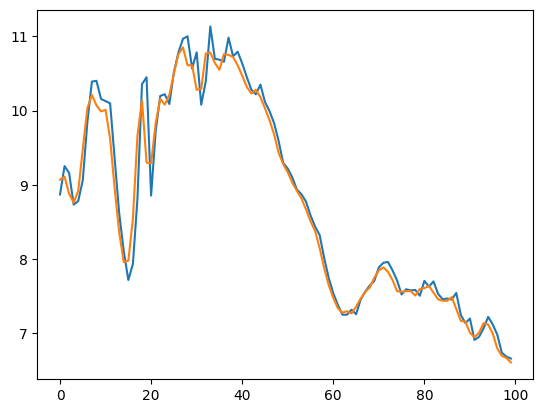

In [28]:
plot_predictions1(model1, X_test1, y_test1)

In [29]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [31]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 7.4198 - root_mean_squared_error: 2.7239 - val_loss: 0.2511 - val_root_mean_squared_error: 0.5011
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1947 - root_mean_squared_error: 0.4413 - val_loss: 0.2016 - val_root_mean_squared_error: 0.4490
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1445 - root_mean_squared_error: 0.3801 - val_loss: 0.1419 - val_root_mean_squared_error: 0.3767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1000 - root_mean_squared_error: 0.3162 - val_loss: 0.0998 - val_root_mean_squared_error: 0.3158
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0774 - root_mean_squared_error: 0.2781 - val_loss: 0.0779 - val_root_mean_squared_error: 0.2791
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0623 - root_mean_squared_error: 0.2496 - val_loss: 0

In [32]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [34]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 33.4795 - root_mean_squared_error: 5.7861 - val_loss: 0.2535 - val_root_mean_squared_error: 0.5035
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0678 - root_mean_squared_error: 1.0334 - val_loss: 0.1029 - val_root_mean_squared_error: 0.3208
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2217 - root_mean_squared_error: 0.4709 - val_loss: 0.0727 - val_root_mean_squared_error: 0.2696
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0977 - root_mean_squared_error: 0.3126 - val_loss: 0.0605 - val_root_mean_squared_error: 0.2459
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2315
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0520 - root_mean_squared_error: 0.2280 - val_

In [35]:
temp_climate_data = pd.DataFrame({'Temperature':temp})
temp_climate_data['Seconds'] = temp_climate_data.index.map(pd.Timestamp.timestamp)
temp_climate_data

,Temperature,Seconds
Date Time,,
2009-01-01 00:10:00,-8.02,1.230769e+09
2009-01-01 00:20:00,-8.41,1.230769e+09
2009-01-01 00:30:00,-8.51,1.230770e+09
2009-01-01 00:40:00,-8.31,1.230770e+09
2009-01-01 00:50:00,-8.27,1.230771e+09
...,...,...
2016-12-31 23:20:00,-4.05,1.483226e+09
2016-12-31 23:30:00,-3.35,1.483227e+09
2016-12-31 23:40:00,-3.16,1.483228e+09


In [36]:
day = 60*60*24
year = 365.2425*day

temp_climate_data['Day sin'] = np.sin(temp_climate_data['Seconds'] * (2* np.pi / day))
temp_climate_data['Day cos'] = np.cos(temp_climate_data['Seconds'] * (2 * np.pi / day))
temp_climate_data['Year sin'] = np.sin(temp_climate_data['Seconds'] * (2 * np.pi / year))
temp_climate_data['Year cos'] = np.cos(temp_climate_data['Seconds'] * (2 * np.pi / year))
temp_climate_data.head()

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,-8.02,1.230769e+09,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,1.230769e+09,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,1.230770e+09,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,1.230770e+09,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,1.230771e+09,0.216440,0.976296,0.009930,0.999951


In [37]:
temp_climate_data = temp_climate_data.drop('Seconds', axis=1)
temp_climate_data.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 00:10:00,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,-8.27,0.216440,0.976296,0.009930,0.999951


In [38]:
def climate_data_to_X_y2(climate_data, window_size=6):
  climate_data_as_np = climate_data.to_numpy()
  X = []
  y = []
  for i in range(len(climate_data_as_np)-window_size):
    row = [r for r in climate_data_as_np[i:i+window_size]]
    X.append(row)
    label = climate_data_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [39]:
X2, y2 = climate_data_to_X_y2(temp_climate_data)
X2.shape, y2.shape

((420545, 6, 5), (420545,))

In [40]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (355545, 6, 5), (355545,))

In [41]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [42]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 0.17126232,  0.53729961, -0.84339145,  0.99686941,
          0.07906569],
        [ 0.18550315,  0.5       , -0.8660254 ,  0.99687885,
          0.0789466 ],
        [ 0.19317128,  0.46174861, -0.88701083,  0.99688827,
          0.07882751],
        [ 0.2161757 ,  0.42261826, -0.90630779,  0.99689768,
          0.07870842],
        [ 0.19426673,  0.38268343, -0.92387953,  0.99690708,
          0.07858933],
        [ 0.20303032,  0.34202014, -0.93969262,  0.99691646,
          0.07847023]],

       [[ 0.18550315,  0.5       , -0.8660254 ,  0.99687885,
          0.0789466 ],
        [ 0.19317128,  0.46174861, -0.88701083,  0.99688827,
          0.07882751],
        [ 0.2161757 ,  0.42261826, -0.90630779,  0.99689768,
          0.07870842],
        [ 0.19426673,  0.38268343, -0.92387953,  0.99690708,
          0.07858933],
        [ 0.20303032,  0.34202014, -0.93969262,  0.99691646,
          0.07847023],
        [ 0.20741211,  0.3007058 , -0.95371695,  0.99692582,
          0.0

In [43]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [45]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 26.2401 - root_mean_squared_error: 5.1225 - val_loss: 0.8648 - val_root_mean_squared_error: 0.9299
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2355 - root_mean_squared_error: 1.1115 - val_loss: 0.4253 - val_root_mean_squared_error: 0.6522
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4125 - root_mean_squared_error: 0.6422 - val_loss: 0.3578 - val_root_mean_squared_error: 0.5982
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2870 - root_mean_squared_error: 0.5357 - val_loss: 0.2775 - val_root_mean_squared_error: 0.5267
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2277 - root_mean_squared_error: 0.4772 - val_loss: 0.2317 - val_root_mean_squared_error: 0.4813
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1844 - root_mean_squared_error: 0.4294 - val_

11111/11111 [==============================] - 28s 3ms/step


(        Predictions  Actuals
 0          9.266787     9.11
 1          9.253205     8.88
 2          9.108374     8.76
 3          8.926840     8.92
 4          8.935074     9.48
 ...             ...      ...
 355540    -4.149566    -4.05
 355541    -4.070436    -3.35
 355542    -3.806652    -3.16
 355543    -3.564735    -4.23
 355544    -3.788490    -4.82
 
 [355545 rows x 2 columns],
 0.09465396548259318)

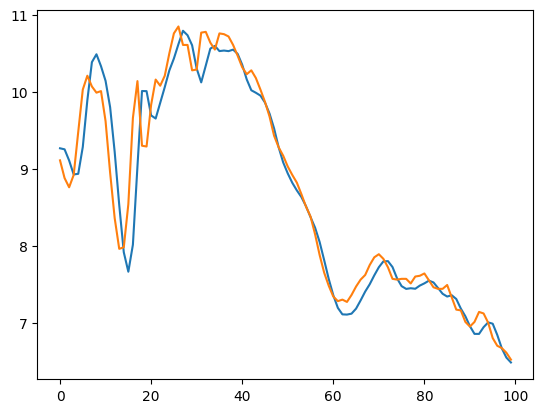

In [46]:
plot_predictions1(model4, X2_test, y2_test)

In [47]:
p_temp_climate_data = pd.concat([climate_data['p (mbar)'], temp_climate_data], axis=1)
p_temp_climate_data.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 00:10:00,996.52,-8.02,0.043619,0.999048,0.009452,0.999955
2009-01-01 00:20:00,996.57,-8.41,0.087156,0.996195,0.009571,0.999954
2009-01-01 00:30:00,996.53,-8.51,0.130526,0.991445,0.009691,0.999953
2009-01-01 00:40:00,996.51,-8.31,0.173648,0.984808,0.009810,0.999952
2009-01-01 00:50:00,996.51,-8.27,0.216440,0.976296,0.009930,0.999951


In [48]:
def climate_data_to_X_y3(climate_data, window_size=7):
  climate_data_as_np = climate_data.to_numpy()
  X = []
  y = []
  for i in range(len(climate_data_as_np)-window_size):
    row = [r for r in climate_data_as_np[i:i+window_size]]
    X.append(row)
    label = [climate_data_as_np[i+window_size][0], climate_data_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [49]:
X3, y3 = climate_data_to_X_y3(p_temp_climate_data)
X3.shape, y3.shape

((420544, 7, 6), (420544, 2))

In [50]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6),
 (60000, 2),
 (5000, 7, 6),
 (5000, 2),
 (355544, 7, 6),
 (355544, 2))

In [51]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [52]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

In [53]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.47792409,  0.18220966],
       [-0.47239294,  0.16906414],
       [-0.4746054 ,  0.1865915 ],
       ...,
       [ 1.35178046, -1.13672383],
       [ 1.35067423, -1.25393801],
       [ 1.35178046, -1.31857014]])

In [54]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                18176     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [56]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.1077 - root_mean_squared_error: 0.3282 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0682
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0032 - root_mean_squared_error: 0.0569 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0578
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0024 - root_mean_squared_error: 0.0487 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0536
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0020 - root_mean_squared_error: 0.0445 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0017 - root_mean_squared_error: 0.0409 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375 - val_l

In [57]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  climate_data = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(climate_data['Temperature Predictions'][start:end])
  plt.plot(climate_data['Temperature Actuals'][start:end])
  plt.plot(climate_data['Pressure Predictions'][start:end])
  plt.plot(climate_data['Pressure Actuals'][start:end])
  return climate_data[start:end]

11111/11111 [==============================] - 29s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.212307,0.182210,-0.509216,-0.477924
1,0.193584,0.169064,-0.497582,-0.472393
2,0.174734,0.186591,-0.487397,-0.474605
3,0.176426,0.247937,-0.486769,-0.476818
4,0.218370,0.308188,-0.498795,-0.484561
...,...,...,...,...
95,-0.044491,-0.056601,-0.706486,-0.724613
96,-0.058857,-0.059887,-0.707577,-0.741207
97,-0.067414,-0.066460,-0.714896,-0.748950
98,-0.074281,-0.076319,-0.723608,-0.767756


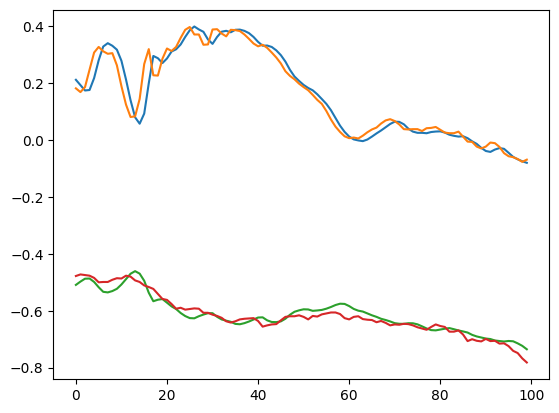

In [58]:
plot_predictions2(model5, X3_test, y3_test)

In [59]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [60]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  climate_data = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(climate_data['Temperature Predictions'][start:end])
  plt.plot(climate_data['Temperature Actuals'][start:end])
  plt.plot(climate_data['Pressure Predictions'][start:end])
  plt.plot(climate_data['Pressure Actuals'][start:end])
  return climate_data[start:end]

11111/11111 [==============================] - 30s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,9.154746,8.88,982.997131,983.28
1,8.983831,8.76,983.102295,983.33
2,8.811758,8.92,983.194336,983.31
3,8.827204,9.48,983.200012,983.29
4,9.210093,10.03,983.091309,983.22
...,...,...,...,...
95,6.810545,6.70,981.213867,981.05
96,6.679398,6.67,981.203979,980.90
97,6.601292,6.61,981.137817,980.83
98,6.538599,6.52,981.059082,980.66


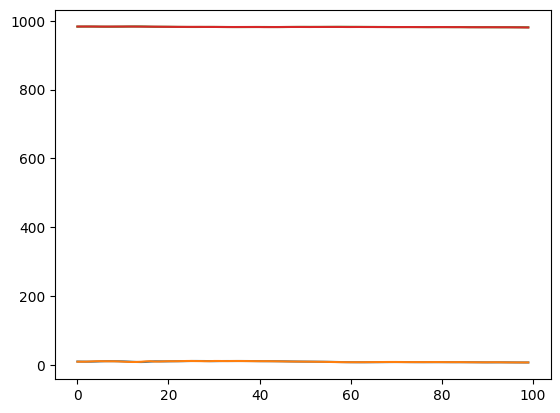

In [61]:
post_processed_climate_data = plot_predictions2(model5, X3_test, y3_test)
post_processed_climate_data

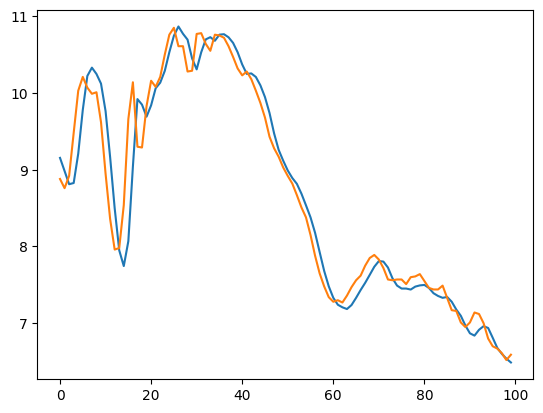

In [62]:
start, end = 0, 100
plt.plot(post_processed_climate_data['Temperature Predictions'][start:end])
plt.plot(post_processed_climate_data['Temperature Actuals'][start:end])

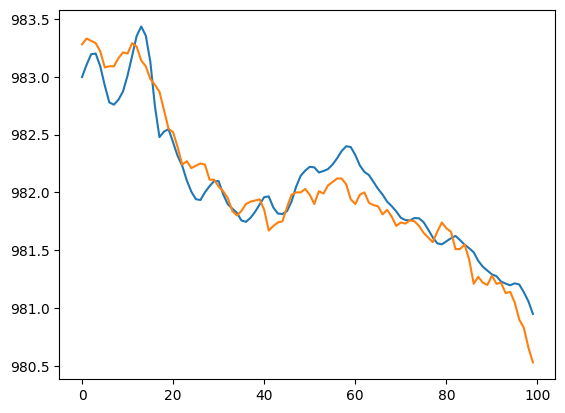

In [63]:
plt.plot(post_processed_climate_data['Pressure Predictions'][start:end])
plt.plot(post_processed_climate_data['Pressure Actuals'][start:end])

In [64]:
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 32)             4992      
                                                                 
 lstm_4 (LSTM)               (None, 64)                24832     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 30362 (118.60 KB)
Trainable params: 30362 (118.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [66]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 26s 12ms/step - loss: 0.0875 - root_mean_squared_error: 0.2957 - val_loss: 0.0051 - val_root_mean_squared_error: 0.0715
Epoch 2/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0036 - root_mean_squared_error: 0.0602 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0029 - root_mean_squared_error: 0.0543 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0573
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0546
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0022 - root_mean_squared_error: 0.0472 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0503
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0019 - root_mean_squared_error: 0.0437 -

In [67]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 3080      
                                                                 
 dense_13 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0744 - root_mean_squared_error: 0.2728 - val_loss: 0.0046 - val_root_mean_squared_error: 0.0681
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0028 - root_mean_squared_error: 0.0532 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0552
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0019 - root_mean_squared_error: 0.0432 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0469
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0014 - root_mean_squared_error: 0.0369 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0407
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0363
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 9.1335e-04 - root_mean_squared_error: 0.0302 - val_los